## 01. Analisis Exploratorio

#### Importación de Datos

In [1]:
# Librerias

import pandas as pd
import numpy as np

# Plots

import matplotlib
from matplotlib import pyplot as plt # plots
import seaborn as sns # plots

# Metricas

from scipy import stats as sts # normality test JB
from math import sqrt # sqrt
import itertools # aplanar arrays
import math
import sweetviz as sv

import random
random.seed(12345)

In [2]:
d1 = pd.read_csv("../data/Loan_training_set_1_4.csv", header=1)
d2 = pd.read_csv("../data/Loan_training_set_2_4.csv", header=1)
d3 = pd.read_csv("../data/Loan_training_set_3_4.csv", header=1)
d4 = pd.read_csv("../data/Loan_training_set_4_4.csv", header=1)

/Users/laura/opt/anaconda3/envs/practica_final/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/laura/opt/anaconda3/envs/practica_final/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/laura/opt/anaconda3/envs/practica_final/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0,19,129,130,131,134,135,136,139) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/laura/opt/anaconda3/envs/practica_final/lib/python3.8/site-packages/IPyth

In [3]:
d1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,112435993,NaN,2300.0,2300.0,2300.0,36 months,12.62%,77.08,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,112290210,NaN,16000.0,16000.0,16000.0,60 months,12.62%,360.95,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,112436985,NaN,6025.0,6025.0,6025.0,36 months,15.05%,209.01,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,112439006,NaN,20400.0,20400.0,20400.0,36 months,9.44%,652.91,B,B1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,112438929,NaN,13000.0,13000.0,13000.0,36 months,11.99%,431.73,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
d2.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,118659541,NaN,33000.0,33000.0,33000.0,36 months,7.21%,1022.12,A,A3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,119321612,NaN,40000.0,40000.0,40000.0,60 months,15.05%,952.65,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,120122535,NaN,12000.0,12000.0,12000.0,36 months,7.97%,375.88,A,A5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,119246018,NaN,7000.0,7000.0,7000.0,36 months,7.97%,219.26,A,A5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,119374887,NaN,32000.0,32000.0,32000.0,36 months,11.99%,1062.71,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
d3.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,38098114,NaN,15000.0,15000.0,15000.0,60 months,12.39%,336.64,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,36805548,NaN,10400.0,10400.0,10400.0,36 months,6.99%,321.08,A,A3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,37842129,NaN,21425.0,21425.0,21425.0,60 months,15.59%,516.36,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,37612354,NaN,12800.0,12800.0,12800.0,60 months,17.14%,319.08,D,D4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,37662224,NaN,7650.0,7650.0,7650.0,36 months,13.66%,260.20,C,C3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
d4.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68506789,NaN,12000.0,12000.0,12000.0,60 months,9.80%,253.79,B,B3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68426545,NaN,16000.0,16000.0,16000.0,60 months,12.88%,363.07,C,C2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68394562,NaN,30000.0,30000.0,30000.0,36 months,15.77%,1051.31,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66583801,NaN,33600.0,33600.0,33600.0,36 months,10.78%,1096.53,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68466916,NaN,25000.0,25000.0,25000.0,36 months,7.49%,777.55,A,A4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


Concatenamos los cuatro archivos para poder trabajar conjuntamente con ellos:

In [7]:
datos = pd.concat([d1, d2], axis=0)

In [8]:
datos = pd.concat([datos, d3], axis=0)

In [9]:
datos = pd.concat([datos, d4], axis=0)

Seleccionamos una pequeña parte del dataset para realizar el analisis exploratorio

In [10]:
minidatos = datos.head(100000)

In [11]:
minidatos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Columns: 151 entries, id to settlement_term
dtypes: float64(111), object(40)
memory usage: 116.0+ MB


minidatos.shape

In [12]:
minidatos.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,99931.000000,100000.000000,100000.000000,100000.000000,...,279.0,279.000000,279.0,279.000000,251.000000,279.000000,279.000000,24.000000,24.000000,24.000000
mean,NaN,14557.509250,14557.509250,14553.628500,435.663047,8.045800e+04,18.958094,0.356480,698.078650,702.078790,...,3.0,206.857491,3.0,3.025090,612.372191,16079.797384,218.678674,6711.948333,57.879167,15.833333
std,NaN,9475.968618,9475.968618,9473.253646,279.915751,6.707809e+04,13.999829,0.965273,32.961516,32.962142,...,0.0,145.238580,0.0,7.141636,435.359817,9143.815688,242.656612,5345.314225,9.055609,5.239206
min,NaN,1000.000000,1000.000000,1000.000000,30.120000,0.000000e+00,0.000000,0.000000,660.000000,664.000000,...,3.0,15.820000,3.0,0.000000,47.460000,1385.200000,0.010000,670.980000,44.940000,4.000000
25%,NaN,7000.000000,7000.000000,7000.000000,232.090000,4.800000e+04,12.220000,0.000000,670.000000,674.000000,...,3.0,89.325000,3.0,0.000000,261.030000,8717.000000,0.865000,3004.000000,45.000000,12.000000
50%,NaN,12000.000000,12000.000000,12000.000000,361.030000,6.800000e+04,18.090000,0.000000,690.000000,694.000000,...,3.0,171.150000,3.0,0.000000,490.950000,14382.660000,144.060000,4888.000000,64.565000,18.000000
75%,NaN,20000.000000,20000.000000,20000.000000,583.890000,9.700000e+04,24.540000,0.000000,715.000000,719.000000,...,3.0,284.520000,3.0,0.000000,846.360000,22895.410000,375.795000,9871.750000,65.000000,18.000000
max,NaN,40000.000000,40000.000000,40000.000000,1719.830000,8.900000e+06,999.000000,42.000000,845.000000,850.000000,...,3.0,754.030000,3.0,29.000000,2262.090000,39542.450000,1042.200000,22288.000000,65.010000,24.000000


#### Elección de variables:

Vamos a procecer a elegir las variables que consideramos necesarias para realizar nuestro analisis de acuerdo al objetivo del trabajo.

En primer lugar vamos a realizar un analisis de correlación con las variables que nos proporcionan información sobre las cuentas bancarias, consultas y cuotas.

In [13]:
tarjetas_bancarias = minidatos.loc[:,['bc_util','mths_since_recent_bc','mths_since_recent_bc_dlq','num_actv_bc_tl',
                      'num_bc_sats','num_bc_tl','percent_bc_gt_75','total_bc_limit','bc_open_to_buy']]

In [14]:
corr_tarjetas = tarjetas_bancarias.corr()
corr_tarjetas

,bc_util,mths_since_recent_bc,mths_since_recent_bc_dlq,num_actv_bc_tl,num_bc_sats,num_bc_tl,percent_bc_gt_75,total_bc_limit,bc_open_to_buy
bc_util,1.000000,0.153518,0.041766,0.055601,-0.186163,-0.203827,0.844050,-0.260430,-0.544212
mths_since_recent_bc,0.153518,1.000000,-0.079213,-0.263637,-0.297303,-0.237763,0.153660,-0.110320,-0.129735
mths_since_recent_bc_dlq,0.041766,-0.079213,1.000000,-0.005327,-0.030078,0.021068,0.031818,-0.037306,-0.044433
num_actv_bc_tl,0.055601,-0.263637,-0.005327,1.000000,0.840045,0.635253,0.014866,0.500721,0.266910
num_bc_sats,-0.186163,-0.297303,-0.030078,0.840045,1.000000,0.788860,-0.167522,0.632549,0.494818
num_bc_tl,-0.203827,-0.237763,0.021068,0.635253,0.788860,1.000000,-0.177818,0.569978,0.484453
percent_bc_gt_75,0.844050,0.153660,0.031818,0.014866,-0.167522,-0.177818,1.000000,-0.218058,-0.436088
total_bc_limit,-0.260430,-0.110320,-0.037306,0.500721,0.632549,0.569978,-0.218058,1.000000,0.847971
bc_open_to_buy,-0.544212,-0.129735,-0.044433,0.266910,0.494818,0.484453,-0.436088,0.847971,1.000000


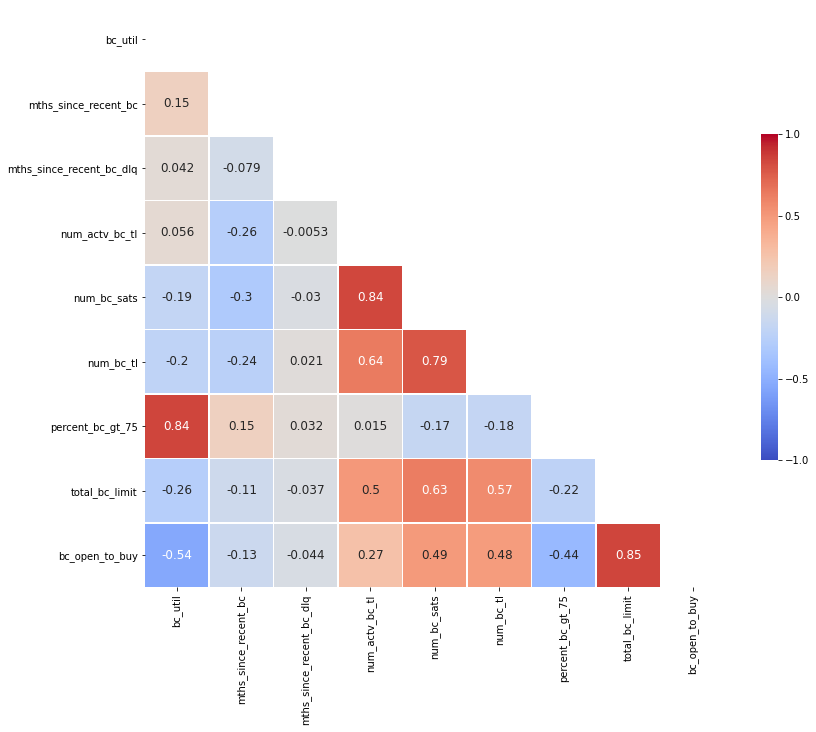

In [15]:
mask1 = np.zeros_like(corr_tarjetas, dtype=np.bool)
mask1[np.triu_indices_from(mask1)]= True

f, ax = plt.subplots(figsize=(13, 15))
heatmap = sns.heatmap(corr_tarjetas, 
                      square = True,
                      mask = mask1,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 12})

ax.set_yticklabels(corr_tarjetas.columns, rotation = 0)
ax.set_xticklabels(corr_tarjetas.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [16]:
consultas = minidatos.loc[:,['inq_fi','inq_last_6mths','inq_last_12m']]

In [17]:
corr_consultas = consultas.corr()
corr_consultas

,inq_fi,inq_last_6mths,inq_last_12m
inq_fi,1.000000,0.199531,0.556113
inq_last_6mths,0.199531,1.000000,0.484415
inq_last_12m,0.556113,0.484415,1.000000


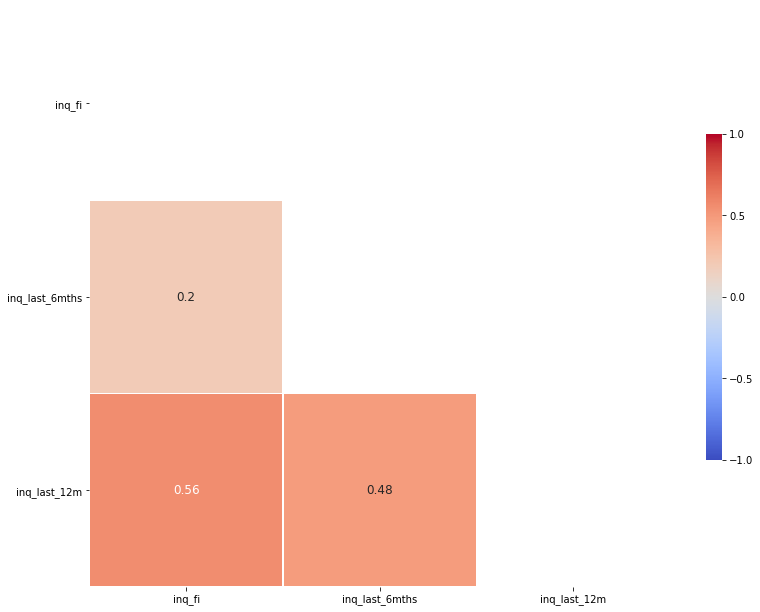

In [18]:
mask2 = np.zeros_like(corr_consultas, dtype=np.bool)
mask2[np.triu_indices_from(mask2)]= True

f, ax = plt.subplots(figsize=(13, 15))
heatmap = sns.heatmap(corr_consultas, 
                      square = True,
                      mask = mask2,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 12})

ax.set_yticklabels(corr_consultas.columns, rotation = 0)
ax.set_xticklabels(corr_consultas.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [19]:
cuotas = minidatos.loc[:,['installment','mo_sin_old_il_acct','mths_since_rcnt_il','num_il_tl','open_il_12m',
                          'open_il_24m','open_act_il','total_bal_il','total_il_high_credit_limit']]

In [20]:
corr_cuotas = cuotas.corr()
corr_cuotas

,installment,mo_sin_old_il_acct,mths_since_rcnt_il,num_il_tl,open_il_12m,open_il_24m,open_act_il,total_bal_il,total_il_high_credit_limit
installment,1.000000,0.094730,-0.022486,0.062437,0.008442,0.035255,0.022421,0.146592,0.211893
mo_sin_old_il_acct,0.094730,1.000000,0.059945,0.353121,0.053129,0.058643,0.149255,0.203238,0.230314
mths_since_rcnt_il,-0.022486,0.059945,1.000000,-0.236935,-0.443455,-0.489462,-0.204348,-0.234476,-0.261741
num_il_tl,0.062437,0.353121,-0.236935,1.000000,0.308849,0.437509,0.645530,0.584665,0.574502
open_il_12m,0.008442,0.053129,-0.443455,0.308849,1.000000,0.702210,0.251767,0.300752,0.288881
open_il_24m,0.035255,0.058643,-0.489462,0.437509,0.702210,1.000000,0.346191,0.374116,0.386857
open_act_il,0.022421,0.149255,-0.204348,0.645530,0.251767,0.346191,1.000000,0.547333,0.537499
total_bal_il,0.146592,0.203238,-0.234476,0.584665,0.300752,0.374116,0.547333,1.000000,0.948940
total_il_high_credit_limit,0.211893,0.230314,-0.261741,0.574502,0.288881,0.386857,0.537499,0.948940,1.000000


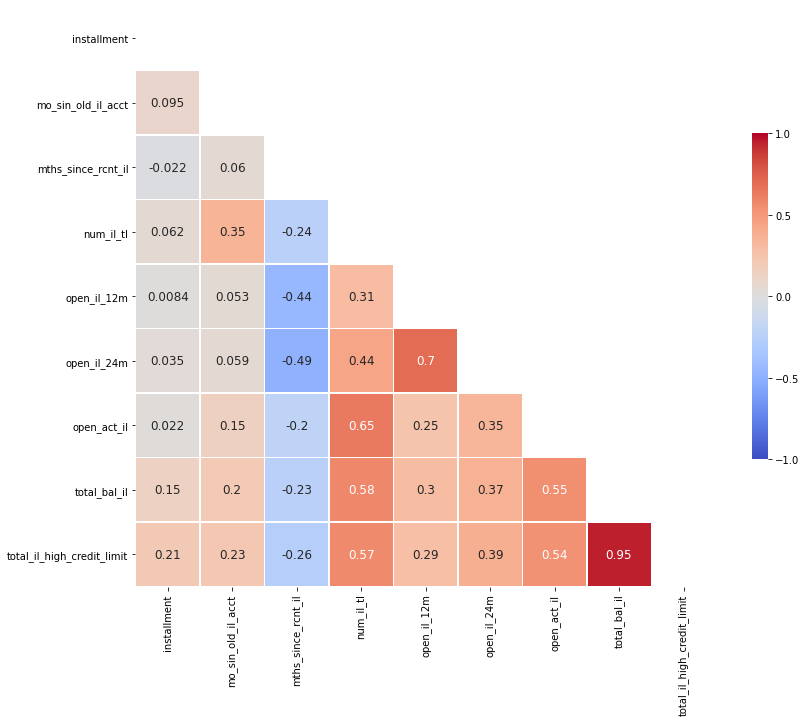

In [21]:
mask3 = np.zeros_like(corr_cuotas, dtype=np.bool)
mask3[np.triu_indices_from(mask3)]= True

f, ax = plt.subplots(figsize=(13, 15))
heatmap = sns.heatmap(corr_cuotas, 
                      square = True,
                      mask = mask3,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 12})

ax.set_yticklabels(corr_cuotas.columns, rotation = 0)
ax.set_xticklabels(corr_cuotas.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [22]:
devoluciones = minidatos.loc[:,['max_bal_bc','mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op','mths_since_recent_revol_delinq',
                        'num_actv_rev_tl','num_op_rev_tl','num_rev_accts','num_rev_tl_bal_gt_0','open_rv_12m',
                        'open_rv_24m','revol_bal','revol_util','total_rev_hi_lim','revol_bal_joint']]

In [23]:
corr_devoluciones = devoluciones.corr()
corr_devoluciones

,max_bal_bc,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mths_since_recent_revol_delinq,num_actv_rev_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,open_rv_12m,open_rv_24m,revol_bal,total_rev_hi_lim,revol_bal_joint
max_bal_bc,1.000000,0.240241,0.105991,-0.001814,0.121274,0.093761,0.122647,0.114925,-0.100631,-0.115906,0.562490,0.487777,0.577563
mo_sin_old_rev_tl_op,0.240241,1.000000,0.080852,0.012137,0.162350,0.199049,0.361367,0.159723,-0.025643,-0.058363,0.228917,0.285186,0.245583
mo_sin_rcnt_rev_tl_op,0.105991,0.080852,1.000000,-0.049500,-0.240246,-0.292456,-0.247372,-0.238581,-0.469165,-0.462478,0.008995,-0.075914,0.062985
mths_since_recent_revol_delinq,-0.001814,0.012137,-0.049500,1.000000,-0.000051,-0.040310,-0.028369,-0.001442,0.070542,0.095720,-0.012778,-0.031955,-0.031765
num_actv_rev_tl,0.121274,0.162350,-0.240246,-0.000051,1.000000,0.792006,0.600195,0.979506,0.365529,0.455351,0.323231,0.371534,0.341594
num_op_rev_tl,0.093761,0.199049,-0.292456,-0.040310,0.792006,1.000000,0.813575,0.796398,0.448272,0.566848,0.248807,0.479066,0.287072
num_rev_accts,0.122647,0.361367,-0.247372,-0.028369,0.600195,0.813575,1.000000,0.595737,0.373471,0.461228,0.235819,0.445217,0.285570
num_rev_tl_bal_gt_0,0.114925,0.159723,-0.238581,-0.001442,0.979506,0.796398,0.595737,1.000000,0.354195,0.444804,0.322854,0.370196,0.341417
open_rv_12m,-0.100631,-0.025643,-0.469165,0.070542,0.365529,0.448272,0.373471,0.354195,1.000000,0.771740,-0.003561,0.114441,-0.036853
open_rv_24m,-0.115906,-0.058363,-0.462478,0.095720,0.455351,0.566848,0.461228,0.444804,0.771740,1.000000,0.002403,0.138011,-0.038012


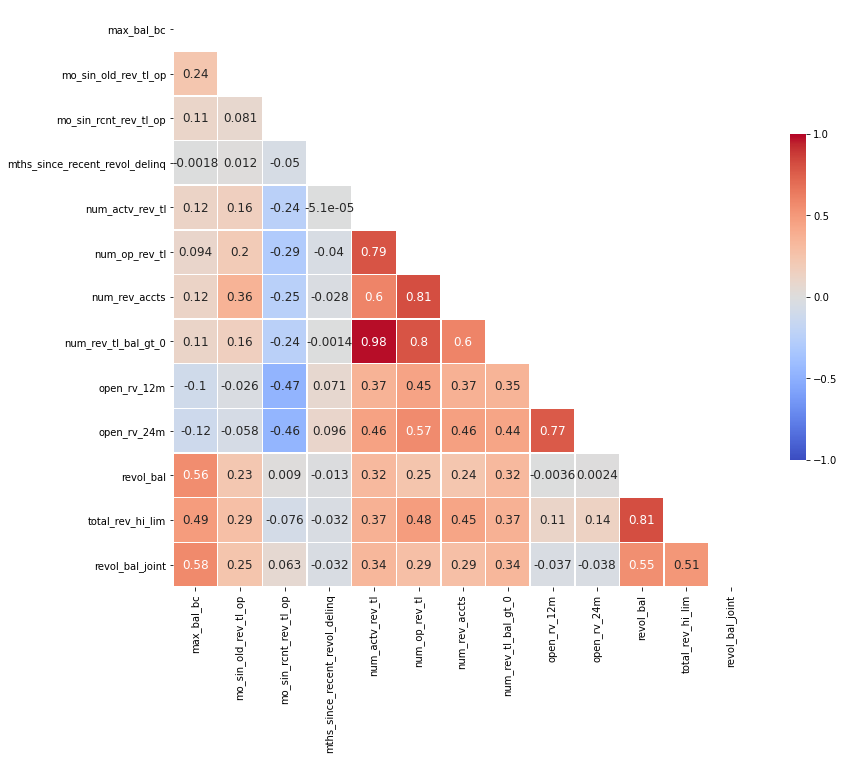

In [24]:
mask4 = np.zeros_like(corr_devoluciones, dtype=np.bool)
mask4[np.triu_indices_from(mask4)]= True

f, ax = plt.subplots(figsize=(13, 15))
heatmap = sns.heatmap(corr_devoluciones, 
                      square = True,
                      mask = mask4,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 12})

ax.set_yticklabels(corr_devoluciones.columns, rotation = 0)
ax.set_xticklabels(corr_devoluciones.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

Excluimos de nuestro analisis la variable 'num_act_rev_tl' porque nos da información sobre las operaciones con un saldo superior a cero.

In [25]:
del minidatos['num_rev_tl_bal_gt_0']

A continuación procedemosa tratar los NA de nuestro dataset:

In [26]:
percentaje_NaN = minidatos.apply(lambda x: sum(x.isna()/len(datos)))
percentaje_NaN.sort_values(ascending = False).head(40)

member_id                                     0.113009
desc                                          0.113009
settlement_term                               0.112982
settlement_amount                             0.112982
settlement_date                               0.112982
settlement_status                             0.112982
debt_settlement_flag_date                     0.112982
settlement_percentage                         0.112982
orig_projected_additional_accrued_interest    0.112726
hardship_end_date                             0.112694
hardship_type                                 0.112694
hardship_reason                               0.112694
deferral_term                                 0.112694
hardship_amount                               0.112694
hardship_start_date                           0.112694
hardship_status                               0.112694
payment_plan_start_date                       0.112694
hardship_dpd                                  0.112694
hardship_l

In [27]:
minidatos.to_csv('../data/EDA_set.csv', index = None, header=True)

Guardamos el dataset seleccionado para el analisis.